# Attention

## Let's start with neural machine translation

The first paper about attention models is widely thought to be https://arxiv.org/pdf/1409.0473.pdf. It was really a paper about neural machine translation.

An illustration of neural MT:
<video width=" " height=" " 
       src="https://jalammar.github.io/images/seq2seq_5.mp4"  
       controls>
</video>

*Courtesy of Jay Alammar*

The encoder was a RNN and the decoder was a RNN.

The "context" was the hidden state at the end of encoding.

Unlike the character level RNNs we've looked at so far, this type of model uses either word-level *embeddings* or byte pair encoding *embeddings*. An embedding is a fixed-length vector representation of the input, learned using a simple neural network (or learned as part of training the encoder-decoder!).

Let's "unroll" this neural MT encoder-decoder:

<video width=" " height=" " 
       src="https://jalammar.github.io/images/seq2seq_6.mp4"  
       controls>
</video>

*Courtesy of Jay Alammar*

Look at all those intermediate hidden states that get lost! What a shame! Some tokens might be possible to just move directly fron the input to the output (digits) but only if you know they are there, as opposed to having them hidden in a compiled history.

**The key insight of Bahdanau 2014 was to figure out a way to let the decoder "pay attention to" the input differentially as it progresses.**

<video width=" " height=" " 
       src="https://jalammar.github.io/images/seq2seq_7.mp4"  
       controls>
</video>


*Courtesy of Jay Alammar*

The system trains a feedforward network *alongside* the encoder-decoder network. The feedforward network is trained to fit a softmax of a linear combination of the hidden states:

<video width=" " height=" " 
       src="https://jalammar.github.io/images/attention_process.mp4"  
       controls>
</video>


*Courtesy of Jay Alammar*

Basic decoder:
* $s_i = f(s_{i−1}, y_{i−1})$ where $s_i$ is the hidden state of the decoder at position $i$ and $y_i$ is the input at position $i$
* at position 0, $s_{i-1}$ is the hidden state of the encoder at the end of encoding, and $y_{i-1}$ is a special start token

Decoder with attention
* $s_i = f(s_{i−1}, y_{i−1}, c_i)$ where $s_i$ is the hidden state of the decoder at position $i$ and $y_i$ is the input at position $i$
* $c_i$ = \sum_{j=1}^{T_x} \alpha_{ij} h_j$ where $h_j$ is the hidden state of the encoder at position $j$ and $\alpha_{ij}$ is the weight for $h_j$
* at position 0, $s_{i-1}$ is the hidden state of the encoder at the end of encoding, and $y_{i-1}$ is a special start token

Questions:
* *How is $\alpha_{ij}$ calculated in Bahdanau et al 2014?*
* *What does the attention look like when doing translation?*
* *How well does this model do at translation, compared to one without attention?*


## Queries, keys and values

Let's abstract away a little from the machine translation case. There are things in an input sequence we want to match; if we can "query for" them using weights, we can match them.

The textbook makes an analogy to a database; a database can be arbitrarily large but you can still query it efficiently.

Attention is a form of efficient trained querying:
* Attention $(q, D)$ = $\sum_{i=1}^{m} \alpha(q, k_i) v_i$, where $q$ is a query, $k_i$ are keys, $v_i$ are values and $\alpha(q, k_i)$ are (learned) scalar attention weights

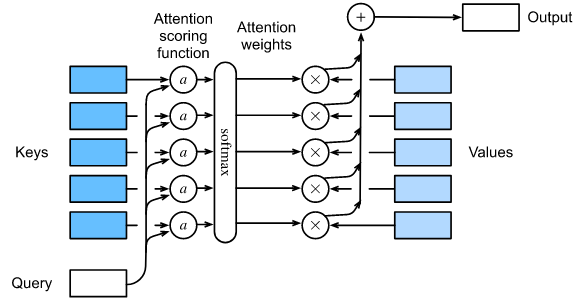

We call this *attention pooling*, by analogy to max pooling.

Questions:
* *What if all the weights but one is 0, and the remaining one is 1*?
* *What if all the weights are equal*?

We typically want to ensure the weights are nonnegative and sum to 1 (for convexity), so we do:
* $\alpha(q, k_i) = softmax $(a(q, k_i)) = $\frac{exp(a(q, k_i))}{\sum_j exp(a(q, k_i))}$

Here are some possible functions for $a$:
1. Scaled dot product attention: $\alpha(q, k_i)$ = softmax $(a(q, k_i))$ = $\frac{exp(q^T k_i / \sqrt{d})}{\sum_{j=1} exp(q^T k_j / \sqrt{d})}$ where $d$ is the variance of the dot products between the queries and keys.
2. Additive attention: $\alpha(q, k_i)$ = softmax $(a(q, k_i))$, where $a(q, k_i) = w_v^T tanh(W_q q + W_k k_i)$, where $W_q, W_k, w_v$ are learned parameters.

Performance tricks:
1. Masked softmax: Inputs to the network are of different lengths. Instead of padding, we just "mask" (set $v_i = 0$ and the attention weights to a large negative number) for all $v_i$ greater than the length of the input.
2. Batch matrix multiplication: We can batch attention across minibatches of queries, keys and values. 

Multi-head attention:
* You often want to have multiple attention pooling mechanisms.
* You just learn multiple feedforward networks!

*Courtesy of Jay Alammar*

Questions:
* *Which attention function did Bahdanau et al 2014 use?*
* *For attention, what is the "netin" and what is the "netact"?*

## Self-attention

Now that we have attention, what if we ditch the RNN and its hidden states altogether and simple calculate keys, queries and values over the input directly?

Step 1:
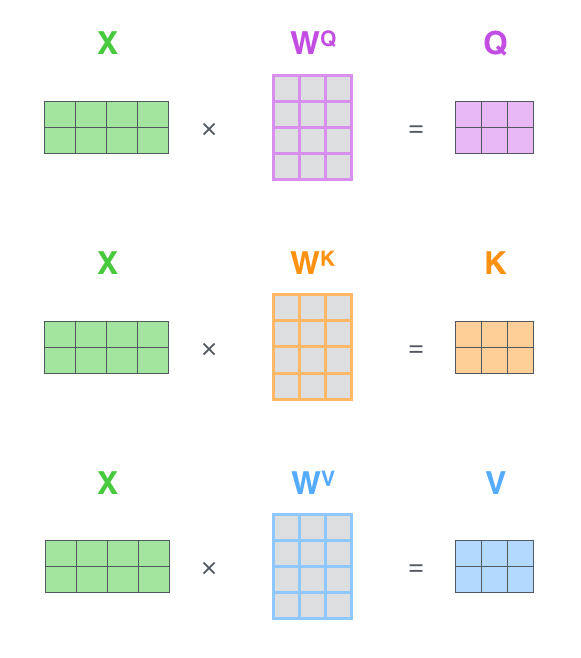

Step 2:
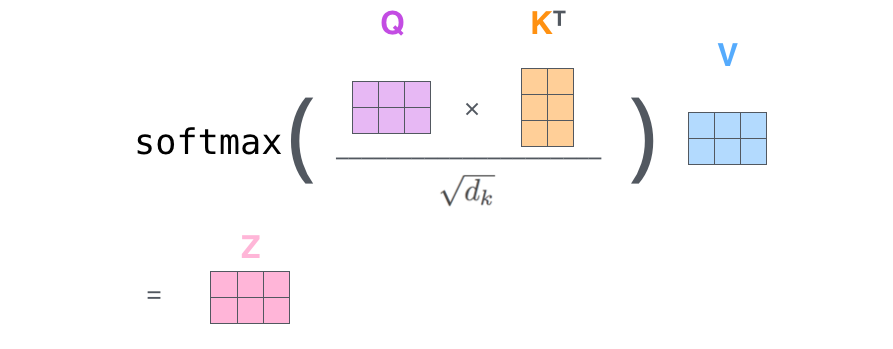

Summing it all up:
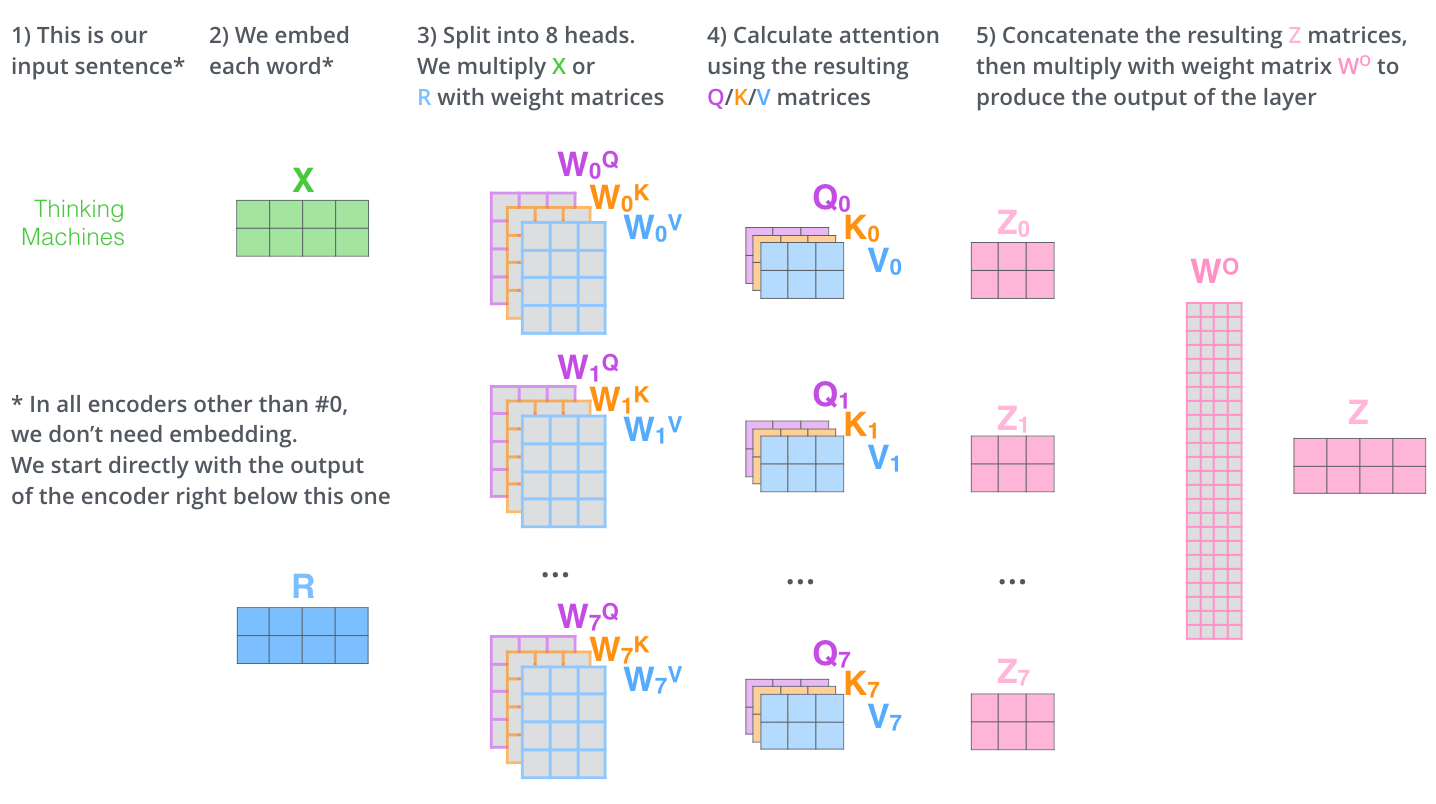

*Courtesy of Jay Alammar*

In order to let the self-attention network have some idea of the positions of the inputs, we add a positional encoding to each $x_i$. This could just be the raw position, but often it's a sin/cosine-based representation of the raw position.

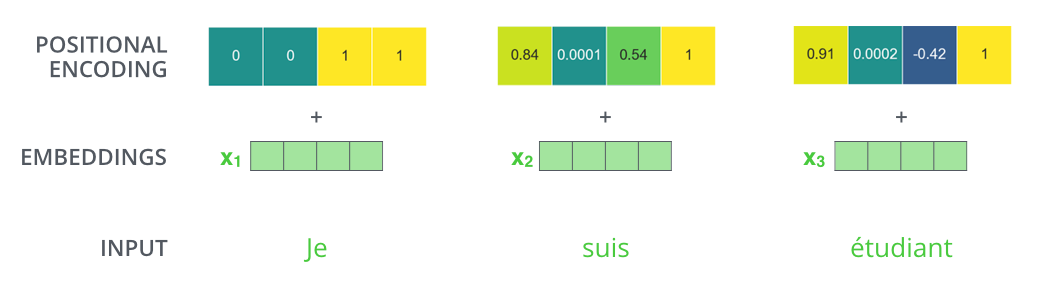

*Courtesy of Jay Alammar*

We are going to look more at this attention-only model on Thursday! https://arxiv.org/pdf/1706.03762.pdf

Questions:
* *What is the computational complexity of a convolutional layer with kernel size $k$, sequence length $n$ and input and output channels $d$?*
* *What is the computational complexity of a RNN with a $d * d$ weight matrix, $d$ dimensional hidden state and input length $n$?*
* *What is the computational complexity of self-attention where the keys, queries and values are all $n * d$ matrices?*
* *Define the sin/cosine-based positional embedding. Why does it make sense?*

# Resources

* https://arxiv.org/pdf/1409.0473.pdf
* https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/
* https://jalammar.github.io/illustrated-transformer/